<a href="https://colab.research.google.com/github/sharanbalu/Stroke_prediction-Project/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Infectious Disease**

# **About dataset**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.






**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


**Importing dataset**

In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Dropping the unrequired column**

In [ ]:
# Deleting the id column

del df['id']

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Treating NaN values**

1. There are some NaN values in "bmi column"
2. Filling NaN values by mean

In [ ]:
# Replacing NaN values by Mean 

df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()
# NaN values filled 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#**Univariat analysis**

Univariate analysis is a statistical method used to analyze and summarize a single variable. It involves examining the distribution, central tendency, and variability of the variable in question without considering any other variable


**Checking Outliers**

**age column**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

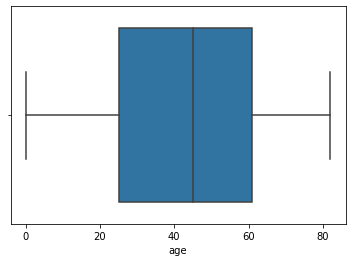

In [ ]:
# Checking by boxplot

sns.boxplot(df['age'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

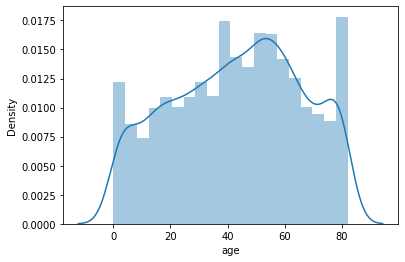

In [ ]:
sns.distplot(df['age'])
# Data has Normally distributed

No outliers found

**hypertension column**

(array([4612.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         498.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

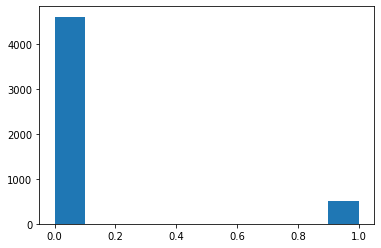

In [ ]:
#sns.boxplot(df['hypertension'])
plt.hist(df['hypertension'])
# Looks like imbalance data, will deal with later

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hypertension', ylabel='Density'>

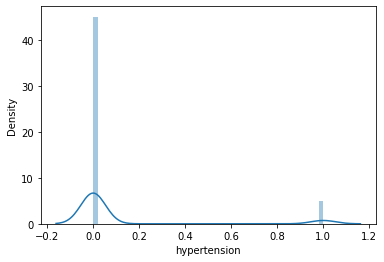

In [ ]:
sns.distplot(df['hypertension'])

In [ ]:
Q1=df['hypertension'].quantile(0.25)
Q3=df['hypertension'].quantile(0.75)
Iqr=Q3-Q1
Iqr

lower= Q1-1.5*Iqr
upper= Q3+1.5*Iqr 
print(lower, upper)

# outliers not found

0.0 0.0


**heart_disease column**

(array([4834.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         276.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

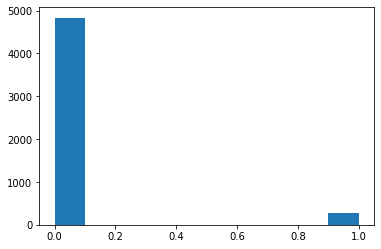

In [ ]:
#sns.boxplot(df['heart_disease'])
plt.hist(df['heart_disease'])

# its imbalnce data, will deal with later

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heart_disease', ylabel='Density'>

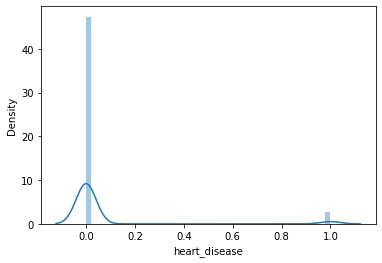

In [ ]:
sns.distplot(df['heart_disease'])

In [ ]:
# Outlier treatment

Q1=df['heart_disease'].quantile(0.25)
Q3=df['heart_disease'].quantile(0.75)
Iqr=Q3-Q1
Iqr

lower= Q1-1.5*Iqr
upper= Q3+1.5*Iqr 
print(lower, upper)

# outliers not found

0.0 0.0


**avg_glucose_level	 column**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

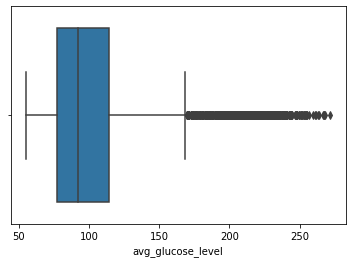

In [ ]:
sns.boxplot(df['avg_glucose_level'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

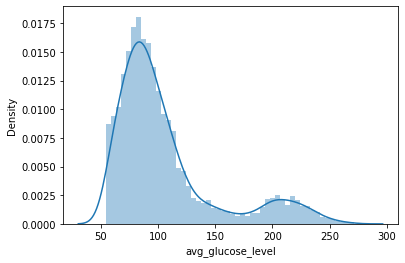

In [ ]:
sns.distplot(df['avg_glucose_level'])

In [ ]:
# Outlier treatment
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
upper_limit,lower_limit


# found some outliers, need to remove

In [ ]:
outlier_mask = (df['avg_glucose_level'] < lower_limit) | (df['avg_glucose_level'] > upper_limit)
df = df[~outlier_mask]

# Removed outliers

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

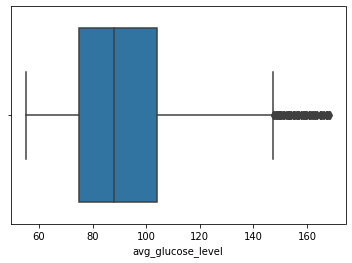

In [ ]:
sns.boxplot(df['avg_glucose_level'])

**bmi column**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

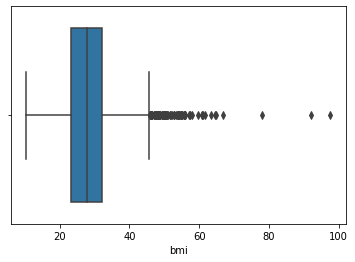

In [ ]:
sns.boxplot(df['bmi'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

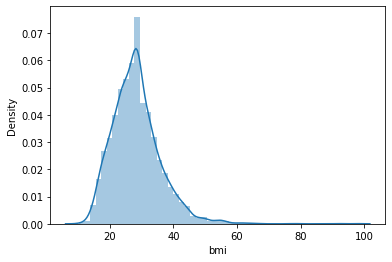

In [ ]:
sns.distplot(df['bmi'])

In [ ]:
# Outlier treatment
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
upper_limit,lower_limit


(45.550000000000004, 9.949999999999998)

In [ ]:
# Removing outliers
outlier_mask = (df['bmi'] < lower_limit) | (df['bmi'] > upper_limit)
df = df[~outlier_mask]


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

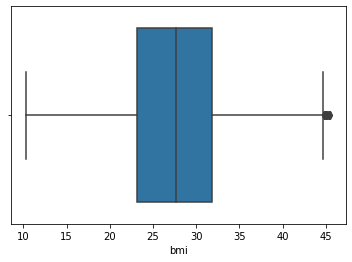

In [ ]:
#sns.displot(df['bmi'])
sns.boxplot(df['bmi'])

**Checking correlation**

In [ ]:
corre=df.corr()
corre

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.252186,0.239679,-0.024772,0.380925,0.227557
hypertension,0.252186,1.000000,0.090491,0.002224,0.152348,0.113637
heart_disease,0.239679,0.090491,1.000000,-0.000684,0.056991,0.090173
avg_glucose_level,-0.024772,0.002224,-0.000684,1.000000,0.000547,0.000119
bmi,0.380925,0.152348,0.056991,0.000547,1.000000,0.031574
stroke,0.227557,0.113637,0.090173,0.000119,0.031574,1.000000


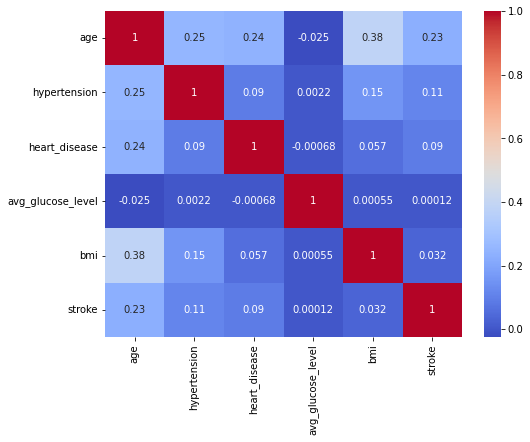

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corre, annot=True, cmap='coolwarm')
plt.show()
# No correlation found

#**Bi-Variate analysis**

Bivariate analysis is a statistical method used to analyze the relationship between two variables

**work_type vs Stroke column**

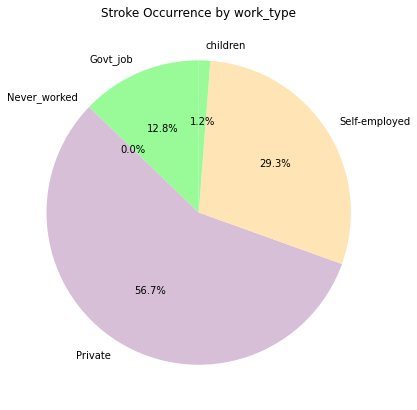

In [ ]:
counts = df.groupby('work_type')['stroke'].sum()
colors2= ['palegreen','paleturquoise','thistle','moccasin']

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=counts.index, colors=colors2, autopct='%1.1f%%',startangle=90)
plt.title('Stroke Occurrence by work_type')
plt.show()

**gender vs stroke**

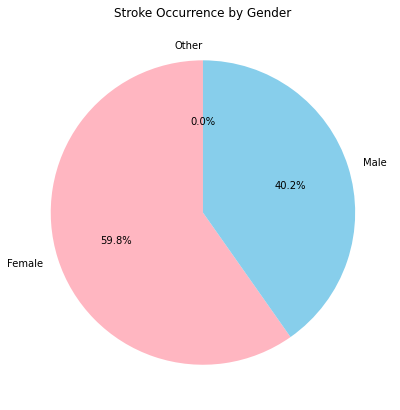

In [ ]:
counts = df.groupby('gender')['stroke'].sum()

colors=['lightpink','skyblue','blue']

plt.figure(figsize=(7,7))
# Create pie chart
plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%',startangle=90)
plt.title('Stroke Occurrence by Gender')
plt.show()

**ever_married vs stroke**

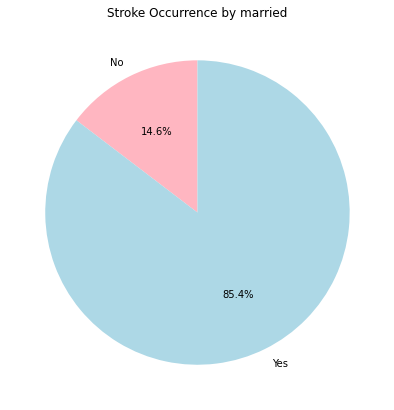

In [ ]:
counts = df.groupby('ever_married')['stroke'].sum()

colors=['lightpink','lightblue']

plt.figure(figsize=(7,7))
# Create pie chart
plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%',startangle=90)
plt.title('Stroke Occurrence by married')
plt.show()

**Reesidence_type vs Stroke**

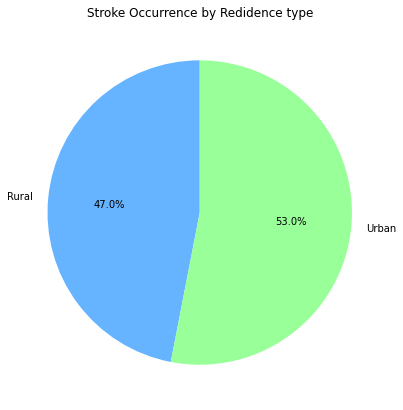

In [ ]:
counts = df.groupby('Residence_type')['stroke'].sum()
colors = ['#66b3ff','#99ff99']

plt.figure(figsize=(7,7))
# Create pie chart
plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%',startangle=90)
plt.title('Stroke Occurrence by Redidence type')
plt.show()

**smoking_status vs stroke**

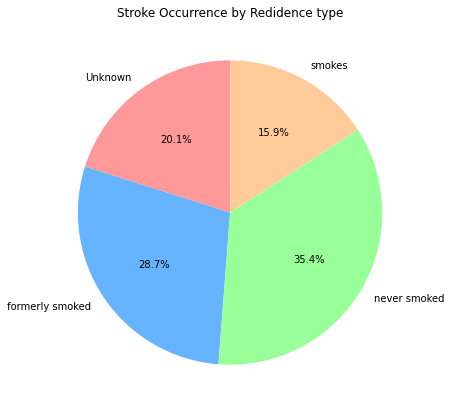

In [ ]:

counts = df.groupby('smoking_status')['stroke'].sum()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(7,7))
# Create pie chart
plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%',startangle=90)
plt.title('Stroke Occurrence by Redidence type')
plt.show()

#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

**Handling Categorical data**

In [ ]:
df=pd.get_dummies(df, columns=['gender','work_type','Residence_type','ever_married','smoking_status'])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
6,74.0,1,1,70.09,27.4,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
7,69.0,0,0,94.39,22.8,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
8,59.0,0,0,76.15,28.7,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
9,78.0,0,0,58.57,24.2,1,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0


**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop(['stroke'], axis=1)
y=df['stroke']


**Resampling the Data**

In [ ]:
# Resampling the Imbalanced data

from imblearn.over_sampling import SMOTE
st=SMOTE()
x_data,y_data=st.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_data,y_data, test_size=0.18, random_state=42)

**Scalling of Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_train=scaled.fit_transform(X_train)
x_test=scaled.fit_transform(X_test)


# **Logistic Regression model**
**Fit Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log.score(x_test,y_test)

0.9624753127057275

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,confusion_matrix
y_pred=log.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9624753127057275
0.9631531484660875


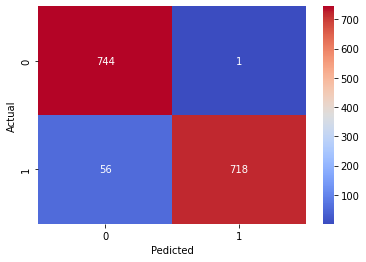

In [ ]:
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Pedicted')
plt.ylabel('Actual')
plt.show()

# **DecisionTree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tre=DecisionTreeClassifier(max_depth=4)
tre.fit(x_train,y_train)

# max_depth is hyper Parameter

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred=tre.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.8071099407504937
0.8097176699096474


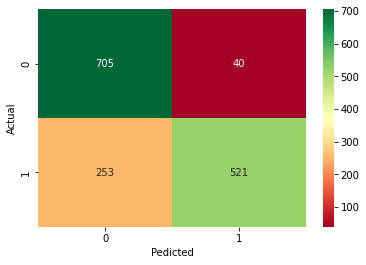

In [ ]:
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, cmap= 'RdYlGn', fmt='g')
plt.xlabel('Pedicted')
plt.ylabel('Actual')
plt.show()

# **RandomForest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9743252139565504
0.9746050326899398


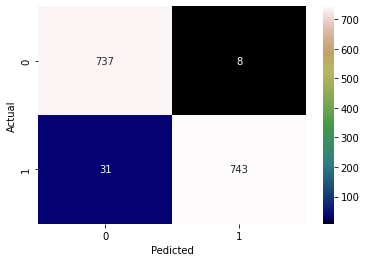

In [ ]:
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, cmap='gist_earth' ,fmt='g')
plt.xlabel('Pedicted')
plt.ylabel('Actual')
plt.show()